In [1]:
# Installation for First Time

In [2]:
# If wordcloud is not installed uncomment the below line by removing # and run it first.
# NOTE: WordCloud is not installed in Jupyter Notebook, so you have to install by pip.

#!pip install wordcloud
#!pip install collection
#!pip install SpaCy
#!python -m spacy download en_core_web_sm
#!python -m spacy download en_core_web_lg

In [3]:
# Importing Libraries from Python

In [4]:
# Import all libraries to be used here.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set up matplotlib style
plt.style.use('ggplot')

# Add libraries for data transformation
import datetime
from string import punctuation

# Libraries for wordcloud making and image importing
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator

# Libraries for Word Embedding
from collections import Counter
import spacy

#Libraries for Word Tokenization
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords 

# Libraries to save path
from pathlib import Path

In [5]:
# Load the DataSet

In [6]:
## Read the dataset using delimitter '\t' ##
## Also print the dataset ##
DataSet = pd.read_csv('amazon_alexa_TEST.tsv',sep = '\t')
print(DataSet)
DataSet.shape

      rating       date         variation  \
0          5  31-Jul-18  Charcoal Fabric    
1          5  31-Jul-18  Charcoal Fabric    
2          4  31-Jul-18    Walnut Finish    
3          5  31-Jul-18  Charcoal Fabric    
4          5  31-Jul-18  Charcoal Fabric    
...      ...        ...               ...   
3145       5  30-Jul-18        Black  Dot   
3146       5  30-Jul-18        Black  Dot   
3147       5  30-Jul-18        Black  Dot   
3148       5  30-Jul-18        White  Dot   
3149       4  29-Jul-18        Black  Dot   

                                       verified_reviews  feedback  
0                                         Love my Echo!         1  
1                                             Loved it!         1  
2     Sometimes while playing a game, you can answer...         1  
3     I have had a lot of fun with this thing. My 4 ...         1  
4                                                 Music         1  
...                                                

(3150, 5)

In [7]:
## Describing the dataset using describe() ##
## This provides us information about the dataset ##
DataSet.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [8]:
## Print the first 5 rows of the dataset for viewing the details of each row and column ##
DataSet.head(7)

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
5,5,31-Jul-18,Heather Gray Fabric,I received the echo as a gift. I needed anothe...,1
6,3,31-Jul-18,Sandstone Fabric,"Without having a cellphone, I cannot use many ...",1


In [9]:
# Transform string data and remove punctuation
###################################################
#               Convert to Lower Case             #
###################################################
DataSet['verified_reviews'] = DataSet.verified_reviews.apply(lambda x : x.lower())     
###################################################
#                Apply Punctuation                #
###################################################
DataSet['verified_reviews'] = DataSet.verified_reviews.apply(lambda x : ''.join([c for c in x if c not in punctuation]))
DataSet.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,love my echo,1
1,5,31-Jul-18,Charcoal Fabric,loved it,1
2,4,31-Jul-18,Walnut Finish,sometimes while playing a game you can answer ...,1
3,5,31-Jul-18,Charcoal Fabric,i have had a lot of fun with this thing my 4 y...,1
4,5,31-Jul-18,Charcoal Fabric,music,1


In [10]:
# Get length of review for EDA
DataSet['review_length'] = DataSet.verified_reviews.apply(lambda x : len(x))
DataSet.head()

,rating,date,variation,verified_reviews,feedback,review_length
0,5,31-Jul-18,Charcoal Fabric,love my echo,1,12
1,5,31-Jul-18,Charcoal Fabric,loved it,1,8
2,4,31-Jul-18,Walnut Finish,sometimes while playing a game you can answer ...,1,192
3,5,31-Jul-18,Charcoal Fabric,i have had a lot of fun with this thing my 4 y...,1,168
4,5,31-Jul-18,Charcoal Fabric,music,1,5


In [11]:
# Find mean, standard deviation and maximum for the dataset
print('The mean for the length of review:', DataSet['review_length'].mean())
print('The standard deviation for the length of reviews:', DataSet['review_length'].std())
print('The maximum for the length of reviews:', DataSet['review_length'].max())

The mean for the length of review: 128.1615873015873
The standard deviation for the length of reviews: 177.17558499255605
The maximum for the length of reviews: 2730


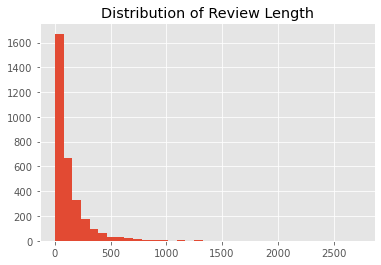

In [12]:
# Let's take a look at the distribution of the length
DataSet['review_length'].hist(bins=35)
plt.title('Distribution of Review Length')
plt.savefig("Distribution of Review Length")

In [13]:
# Tranform date to datetime data-type
DataSet['date'] = DataSet.date.apply(lambda x : datetime.datetime.strptime(x, '%d-%b-%y'))
DataSet.head()

,rating,date,variation,verified_reviews,feedback,review_length
0,5,2018-07-31,Charcoal Fabric,love my echo,1,12
1,5,2018-07-31,Charcoal Fabric,loved it,1,8
2,4,2018-07-31,Walnut Finish,sometimes while playing a game you can answer ...,1,192
3,5,2018-07-31,Charcoal Fabric,i have had a lot of fun with this thing my 4 y...,1,168
4,5,2018-07-31,Charcoal Fabric,music,1,5


In [14]:
DataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   rating            3150 non-null   int64         
 1   date              3150 non-null   datetime64[ns]
 2   variation         3150 non-null   object        
 3   verified_reviews  3150 non-null   object        
 4   feedback          3150 non-null   int64         
 5   review_length     3150 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 147.8+ KB


In [15]:
A = np.array(Image.open('amazon-logo-white.png'))

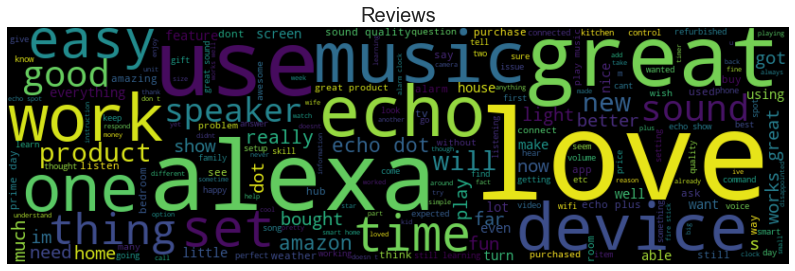

In [16]:
np.random.seed(321)
sns.set(rc={'figure.figsize':(14,8)})
reviews  = ' '.join(DataSet['verified_reviews'].tolist())

wordcloud = WordCloud(mask=A , background_color="black").generate(reviews)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('Reviews', size=20)
plt.savefig("Reviews of first word cloud using Amazon logo")
plt.show()

In [17]:
# This is the first word cloud by using Amazon logo(AMAZON).
# From the above word cloud we can see some normal words and positive reviews.
# For the positive parts we saw some good quality words : 
# 1. love/good/new
# 2. great/use/work/thing

# We will implement more word clouds like this, but lets evaluate the count of each variation of the dataset w.r.t. 90 rotation

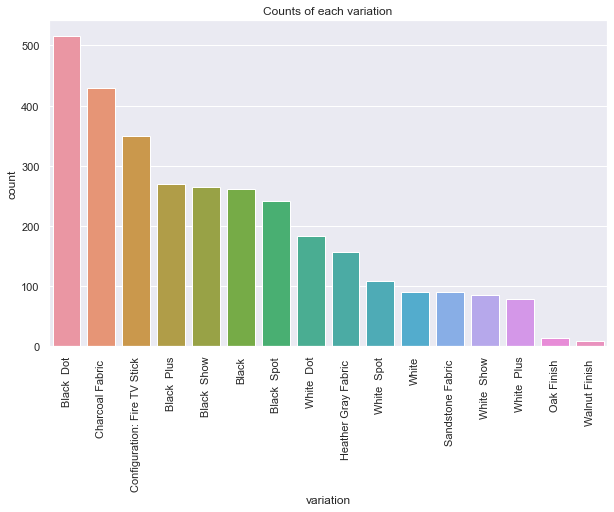

In [87]:
sns.set(rc={'figure.figsize':(10,6)})
sns.countplot(x = DataSet.variation,
              order = DataSet['variation'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Counts of each variation')
plt.savefig("Counts of each variation")
plt.show()

In [19]:
#  To see the value of counts we need to see the ratings for value_counts for the whole dataset

In [20]:
DataSet.rating.value_counts()

5    2286
4     455
1     161
3     152
2      96
Name: rating, dtype: int64

In [21]:
###########################################################################
##  Now we will evaluate word clouds for DataSet reviews with rating = 5 ##
###########################################################################

In [22]:
# Lets extract a new dataset from the old one using the Filter rating = 5.
DataSet5 = DataSet[DataSet.rating == 5]
DataSet_Not_5 = DataSet[DataSet.rating != 5]

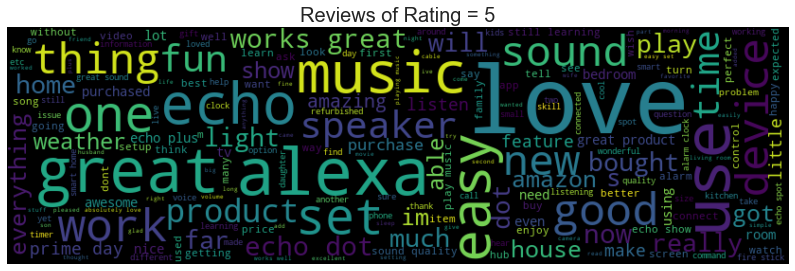

In [23]:
sns.set(rc={'figure.figsize':(14,8)})
reviews  = ' '.join(DataSet5['verified_reviews'].tolist())

wordcloud = WordCloud(mask=A , background_color="black").generate(reviews)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('Reviews of Rating = 5', size=20)
plt.savefig("Reviews of Rating = 5 using word cloud")
plt.show()

In [24]:
# Lets take a look at 5 rating reviews of the prime members(AMAZON PRIME) - We considered PRIME as a starting example based
# on the above word cloud
pd.options.display.max_colwidth = 1000
DataSet5[DataSet5['verified_reviews'].str.contains('prime')]['verified_reviews'][:10]

39                                                                                                                                                                                                                                                                                                                                                                                                this is my first digital assistant so im giving this a good review speaker is really good for the cheap price on prime day fun to play with and can be used as an alarm clock thats what i was going to get in the first place but i ended up with echo if you havent had a go with one then definitely try itwhat i like best is the number of other devices that it can connect with my purchase came with a smart plug for 10 which i connect my lamp to alexa turn of the lights
89                                                                                                                                               

In [25]:
# From the above example we could see reviews containing keyword PRIME, so we will see verified_reviews conatining EASY and TIME
pd.options.display.max_colwidth = 1000
DataSet5[DataSet5['verified_reviews'].str.contains('easy')]['verified_reviews'][:10]

11     i love it learning knew things with it eveyday still figuring out how everything works but so far its been easy to use and understand she does make me laugh at times
16                                                                                                         really happy with this purchase  great speaker and easy to set up
26                         i love my echo its easy to operate loads of funit is everything as advertised i use it mainly to play my favorite tunes and test alexas knowledge
56                                                                                                    works as advertised very easy to setup still learning what this can do
65                                                                                                                                                 how easy if was to set up
70                                                                                                          great sound in a small pack

In [26]:
pd.options.display.max_colwidth = 1000
DataSet5[DataSet5['verified_reviews'].str.contains('time')]['verified_reviews'][:10]

11                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               i love it learning knew things with it eveyday still figuring out how everything works but so far its been easy to use and understand she does make me laugh at times
12                                                                                                                                               

In [27]:
# From the above word cloud extraction we could see that people who use Alexa and gave rating 5, they think :
# 1. Alexa is easy to set up.
# 2. Alexa is frequently used to reduce time and help people in time management.
# 3. Alexa is very beneficial to prime day customers.
# 4. Alexa recognizes member's voice to play which music. 

In [28]:
###########################################################################
##  Now we will evaluate word clouds for DataSet reviews with rating = 1 ##
###########################################################################

In [29]:
# Lets extract a new dataset from the old one using the Filter rating = 1.
DataSet1 = DataSet[DataSet.rating == 1]

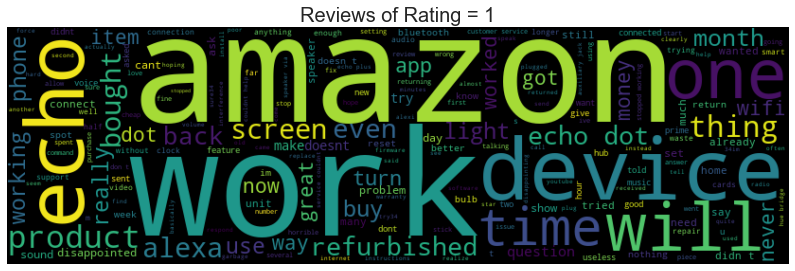

In [30]:
sns.set(rc={'figure.figsize':(14,8)})
reviews  = ' '.join(DataSet1['verified_reviews'].tolist())

wordcloud = WordCloud(mask=A , background_color="black").generate(reviews)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('Reviews of Rating = 1', size=20)
plt.savefig("Reviews of Rating = 1 using word cloud")
plt.show()

In [31]:
# We will see verified_reviews conatining REFURBISHED, DISAPPOINTED, PROBLEM
pd.options.display.max_colwidth = 1000
DataSet1[DataSet1['verified_reviews'].str.contains('refurbished')]['verified_reviews'][:10]

396                                                                                                                                                                                                                                                                                                                                                                                        i bought an echo dot that had been refurbished but its stops whatever function its performing quite often doesnt wake up every time randomly turns on but does nothing do not buy a refurbished echo dot
420                                                                                                                                                                                                                                                                                                                                                                                   item has never worked out of box it is broken 

In [32]:
pd.options.display.max_colwidth = 1000
DataSet1[DataSet1['verified_reviews'].str.contains('disappointed')]['verified_reviews'][:10]

434                                                                                                                                                                                                                                                                                                                                        34never buy certified and refurbished echo dot 34 i bought a 34certified and refurbished 34 echo dot this unit is very poor in receiving command and sometimes it does not even acknowledge the command never buy a refurbished echo dot the unit i received was probably never was certified and refurbished as indicated i also bought a new echo dot it works perfectlyvery disappointed 
1398                                                                                                                                                                                                                                                                                            

In [33]:
pd.options.display.max_colwidth = 1000
DataSet1[DataSet1['verified_reviews'].str.contains('problem')]['verified_reviews'][:10]

418                                                                                                                                                                                                                                                                                                                                                                                                        i wanted to use these as a radio and intercom as we get terrible fm reception where i live  the speech recognition software is horrible  my wife and i both are native americans whose language is english she is from the north i am from texas  neither have an accent from our birth area and yet it does not do a good job understanding us  we bought two they do the same thing  additionally wifi reception was poor to marginal i had to buy wifi range extender for office and the other is ten feet from our router  both had problems switched them around no difference  so it they are now disconnected dust col

In [34]:
# From the above word cloud extraction we could see that people who use Alexa and gave rating 1, they think :
# 1. Alexa lacks advanced speech recognition technique for bilingual languages.
# 2. Alexa has poor interference with internet connection.
# 3. Alexa products sometimes keep running in background to collect private information.
# 4. Alexa's services are not fully enabled, needs subscription.

In [35]:
####################################################################################
##  Now we will evaluate word clouds for DataSet reviews with rating = 4, 3, 2, 1 ##
####################################################################################

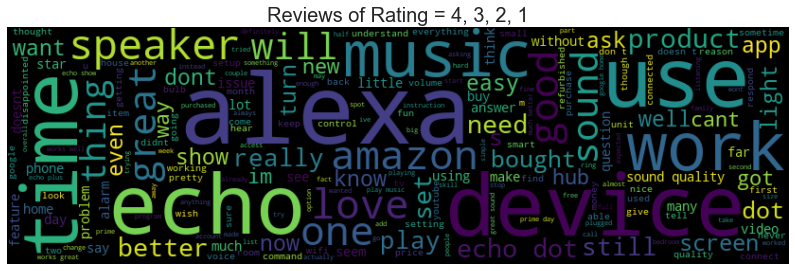

In [36]:
sns.set(rc={'figure.figsize':(14,8)})
reviews  = ' '.join(DataSet_Not_5['verified_reviews'].tolist())

wordcloud = WordCloud(mask=A , background_color="black").generate(reviews)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('Reviews of Rating = 4, 3, 2, 1', size=20)
plt.savefig("Reviews of Mixed Rating(4,3,2,1) using word cloud")
plt.show()

In [37]:
# Lets check with the ratings we formulated above like :
# 1. DataSet5 includes all verified_reviews with rating = 5.
# 2. DataSet1 includes all verified_reviews with rating = 1.
# 3. DataSet_Not_5 includes all verified_reviews whose rating is not 5.
# Now verify whether the rating is biased w.r.t. product(AMAZON ALEXA) variation.

C:\Program Files\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


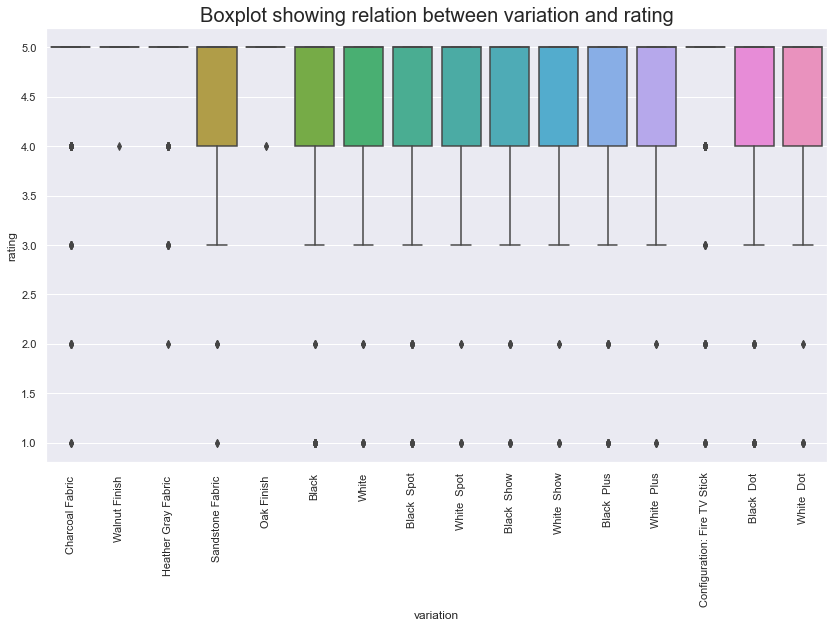

In [38]:
sns.boxplot(DataSet.variation, DataSet.rating)
plt.xticks(rotation = 90)
plt.title('Boxplot showing relation between variation and rating', size=20)
plt.savefig("Boxplot showing relation between variation and rating")
plt.show()

In [39]:
# From the above boxplot we can see that all the ratings w.r.t. product variation are completely biased.
# Most reviews for products belong to rating 5.
# Products with ratings 1 and 2 are considered as Outliers for each product variation.

In [40]:
DataSet.head()

,rating,date,variation,verified_reviews,feedback,review_length
0,5,2018-07-31,Charcoal Fabric,love my echo,1,12
1,5,2018-07-31,Charcoal Fabric,loved it,1,8
2,4,2018-07-31,Walnut Finish,sometimes while playing a game you can answer a question correctly but alexa says you got it wrong and answers the same as you i like being able to turn lights on and off while away from home,1,192
3,5,2018-07-31,Charcoal Fabric,i have had a lot of fun with this thing my 4 yr old learns about dinosaurs i control the lights and play games like categories has nice sound when playing music as well,1,168
4,5,2018-07-31,Charcoal Fabric,music,1,5


In [41]:
# We have two columns to check for understanding the biasing of ratings,i.e., date and review_length.
# Lets compare ratings w.r.t. date.
DataSet_date = DataSet.groupby('date').count()

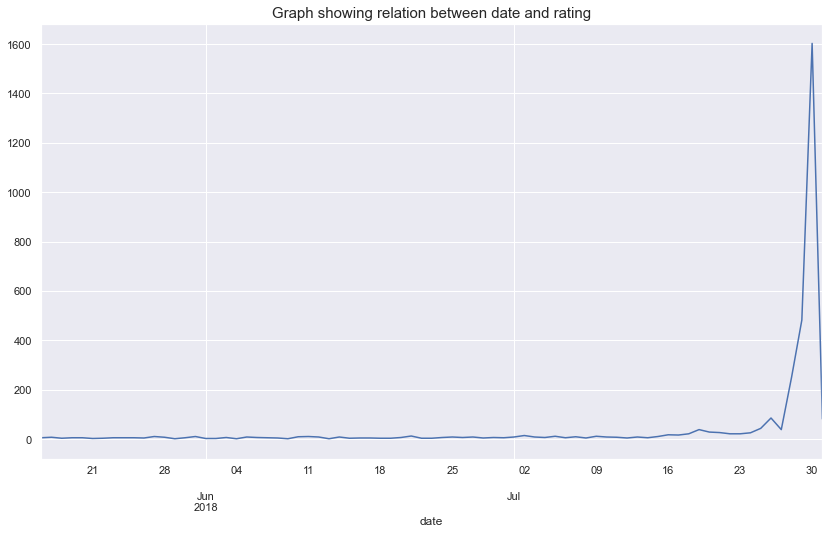

In [42]:
DataSet_date.rating.plot()
plt.title('Graph showing relation between date and rating', size=15)
plt.savefig("Graph showing relation between rating and date")
plt.show()

In [43]:
# From the above calculation, we tried extracting dataset by Date.
# Since we have 3000 entries in the Dataset we want to check whether ratings are eccentric w.r.t. DataSet grouped by date.
# We saw from the above plot that ratings are not eccentric, which means there is a probability that:
# 1. Data is biased even by Date.
# 2. Ratings seems to be taking peak value by the end July 2018.
# 3. Dataset has lot of reviews that may be incomplete or generated by bots.

In [44]:
# Since we saw from the above calculations and plots that none of the data variables were helpful in providing an 
# optimized path in predicting the rating concurrency.
# So, we will use review length as calculated above for finding out which rating has lower distribution and which has maximum.

C:\Program Files\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


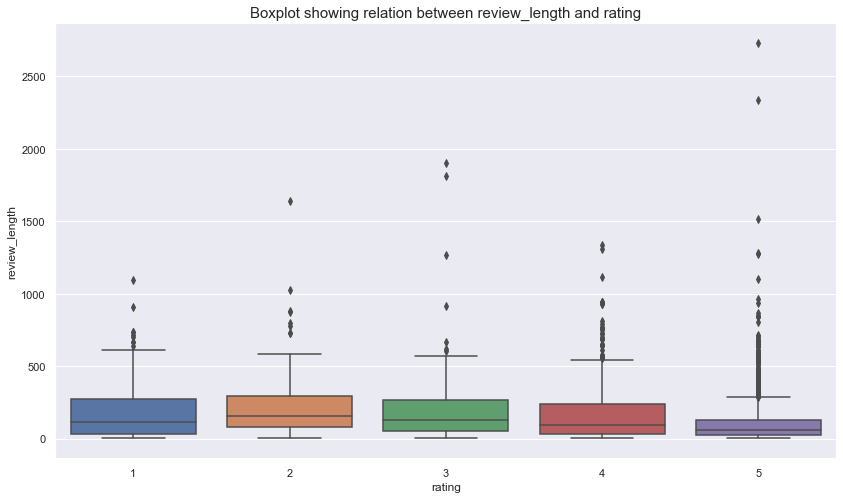

In [45]:
sns.boxplot('rating','review_length', data = DataSet)
plt.title('Boxplot showing relation between review_length and rating', size=15)
plt.savefig("Boxplot showing relation between rating and review_length")
plt.show()

In [46]:
# From the above boxplot it's not obvious to predict which has higher distribution.
# But we can clearly see that the rating 5 has lower distribution.
# In order to get higher/lower distribution more accurate, we will revisit the boxplot on log scale of review_length.

In [47]:
DataSet['log_review_length'] = DataSet.review_length.apply(lambda x : (np.log(x) + 1))

In [48]:
DataSet.head()

,rating,date,variation,verified_reviews,feedback,review_length,log_review_length
0,5,2018-07-31,Charcoal Fabric,love my echo,1,12,3.484907
1,5,2018-07-31,Charcoal Fabric,loved it,1,8,3.079442
2,4,2018-07-31,Walnut Finish,sometimes while playing a game you can answer a question correctly but alexa says you got it wrong and answers the same as you i like being able to turn lights on and off while away from home,1,192,6.257495
3,5,2018-07-31,Charcoal Fabric,i have had a lot of fun with this thing my 4 yr old learns about dinosaurs i control the lights and play games like categories has nice sound when playing music as well,1,168,6.123964
4,5,2018-07-31,Charcoal Fabric,music,1,5,2.609438


C:\Program Files\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


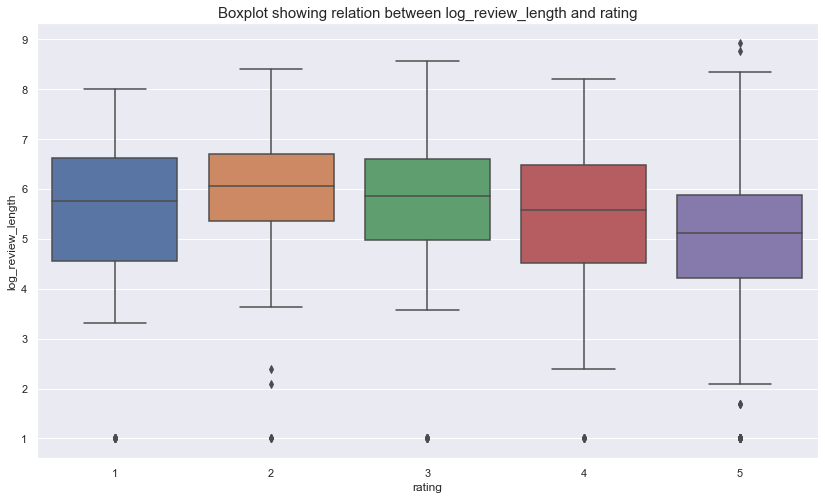

In [49]:
sns.boxplot('rating','log_review_length', data = DataSet)
plt.title('Boxplot showing relation between log_review_length and rating', size=15)
plt.savefig("Boxplot showing relation between rating and log_review_length")
plt.show()

In [50]:
# Well from this above boxplot we could clearly see that :
# --> Rating 5 has lower distribution. 
# --> Rating 3 has higher distribution.

C:\Program Files\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


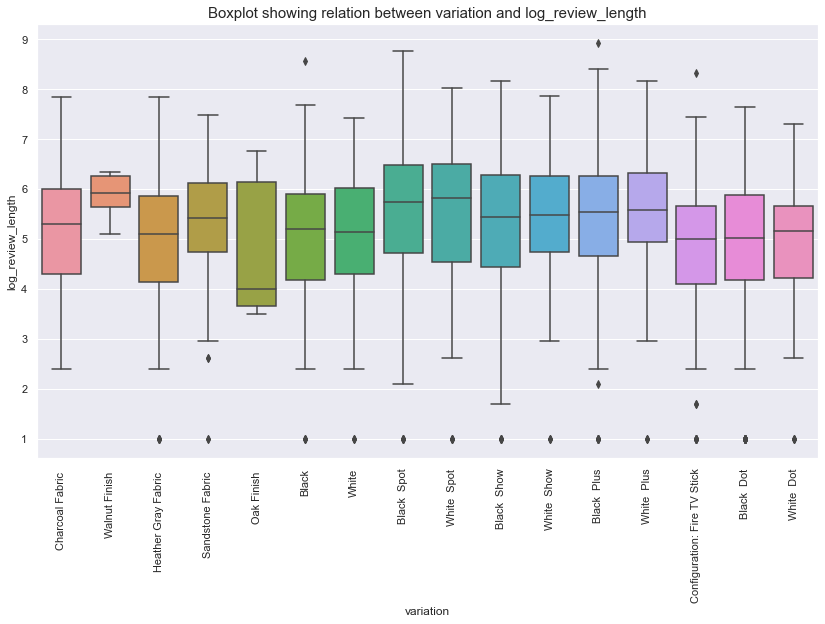

In [51]:
# Now we will find out boxplot for log_review_length w.r.t. variation
sns.boxplot('variation','log_review_length', data = DataSet)
plt.xticks(rotation = 90)
plt.title('Boxplot showing relation between variation and log_review_length', size=15)
plt.savefig("Boxplot showing relation between variation and log_review_length")
plt.show()

In [52]:
# From the above boxplot we can draw a conclusion that review_length on logarithmic scale gives better distribution range 
# for rating and variation of the DataSet. Hence, we would be using log_review_length as a base for sampling criteria.

In [53]:
# Word Embedding

In [54]:
# We will start performing pre processing the reviews by pre processing the reviews using Counter for DataSet
text = ' '.join(DataSet['verified_reviews'].tolist())
review_word = text.split(' ')
all_reviews = ' '.join(review_word)
words = all_reviews.split()

### For checking, uncomment the below lines ###
# print(text)
# print(review_word)
# print(all_reviews)
# print(words)

# Words with wrong DataType
counts = Counter(words)
vocab = sorted(counts, key = counts.get, reverse = True)
vocab_to_int = {word : i for i, word in enumerate(vocab, 1)}

#print(vocab_to_int)

reviews_ints = []
for review in review_word:
    reviews_ints.append([vocab_to_int[word] for word in review.split()])
    
# print(reviews_ints)

In [55]:
# Number of unique words

In [56]:
print('Unique words: ', len((vocab_to_int)))

Unique words:  4613


In [57]:
# Most Common words
counts.most_common(20)

[('the', 3245),
 ('i', 2952),
 ('to', 2821),
 ('it', 2550),
 ('and', 2219),
 ('a', 1503),
 ('my', 1390),
 ('is', 1218),
 ('for', 1061),
 ('love', 951),
 ('echo', 825),
 ('this', 823),
 ('with', 786),
 ('of', 766),
 ('have', 753),
 ('great', 717),
 ('in', 653),
 ('that', 651),
 ('but', 634),
 ('alexa', 586)]

In [58]:
DataSet1['rating'].value_counts()

1    161
Name: rating, dtype: int64

In [59]:
# We will start performing pre processing the reviews  using Counter for DataSet with rating - 1
text1 = ' '.join(DataSet1['verified_reviews'].tolist())
review_word1 = text1.split(' ')
all_reviews1 = ' '.join(review_word1)
words1 = all_reviews1.split()

### For checking, uncomment the below lines ###
#print(text1)
# print(review_word1)
# print(all_reviews1)
# print(words1)

# Words with wrong DataType
counts1 = Counter(words1)
vocab1 = sorted(counts1, key = counts1.get, reverse = True)
vocab_to_int1 = {word : i for i, word in enumerate(vocab1, 1)}

# print(vocab_to_int1)

reviews_ints1 = []
for review in review_word1:
    reviews_ints1.append([vocab_to_int1[word] for word in review.split()])
    
# print(reviews_ints1)

In [60]:
counts1.most_common(100)

[('the', 261),
 ('i', 202),
 ('to', 198),
 ('it', 172),
 ('and', 152),
 ('a', 123),
 ('is', 85),
 ('not', 83),
 ('this', 77),
 ('of', 71),
 ('for', 64),
 ('have', 60),
 ('my', 58),
 ('that', 53),
 ('you', 51),
 ('on', 49),
 ('echo', 49),
 ('in', 49),
 ('with', 46),
 ('but', 43),
 ('amazon', 43),
 ('was', 37),
 ('when', 35),
 ('so', 35),
 ('would', 31),
 ('no', 30),
 ('be', 29),
 ('one', 28),
 ('up', 28),
 ('will', 27),
 ('all', 27),
 ('dot', 26),
 ('from', 25),
 ('device', 25),
 ('work', 24),
 ('product', 24),
 ('does', 23),
 ('as', 23),
 ('get', 22),
 ('they', 21),
 ('or', 21),
 ('if', 21),
 ('an', 20),
 ('me', 20),
 ('its', 20),
 ('can', 19),
 ('bought', 19),
 ('time', 19),
 ('alexa', 18),
 ('works', 18),
 ('just', 18),
 ('do', 18),
 ('am', 18),
 ('very', 18),
 ('even', 18),
 ('screen', 18),
 ('working', 17),
 ('refurbished', 17),
 ('after', 16),
 ('thing', 16),
 ('back', 16),
 ('like', 16),
 ('off', 16),
 ('only', 15),
 ('are', 15),
 ('been', 15),
 ('buy', 14),
 ('we', 14),
 ('has',

In [61]:
DataSet5['rating'].value_counts()

5    2286
Name: rating, dtype: int64

In [62]:
nlp = spacy.load('en_core_web_sm')
def explain_textentities(text):
    doc = nlp(text)
    svg1 = spacy.displacy.render(doc, style="dep")
    svg2 = spacy.displacy.render(doc, style="ent")
    for ent in doc.ents:
        print(f'Entity: {ent}, Label: {ent.label}, {spacy.explain(ent.label_)}')
for i in range(15,20):
    one_sentence = DataSet['verified_reviews'][i]
    explain_textentities(one_sentence)
       

C:\Users\ndas\AppData\Roaming\Python\Python38\site-packages\spacy\displacy\__init__.py:205: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  warnings.warn(Warnings.W006)


Entity: a couple of days, Label: 391, Absolute or relative dates or periods


Entity: 2nd, Label: 396, "first", "second", etc.


In [63]:
# So the Spacy can find out the specific words for you. However, it depends on the package you load in to be accurate or not
# 1st model

for i in ['en_core_web_sm','en_core_web_lg']:
    nlp = spacy.load(i)
    print('This is model:',i)
    for i in range(17,22):
        one_sentence = DataSet['verified_reviews'][i]
        doc = nlp(one_sentence)
        spacy.displacy.render(doc, style='ent',jupyter=True)
        spacy.displacy.render(doc, jupyter=True)

This is model: en_core_web_sm


This is model: en_core_web_lg


In [64]:
# Performing Word Tokenization

In [65]:
DataSet['positive'] = 0
DataSet.loc[DataSet['rating'] ==5, 'positive'] = 1

y = DataSet['positive']

word_tokenize(DataSet.verified_reviews[1])

['loved', 'it']

In [66]:
#Lets see for all data:
stop_words = set(stopwords.words('english')) 

DataSet['cleaned_reviews'] = DataSet.verified_reviews.apply(lambda x: word_tokenize(x))

DataSet['cleaned_reviews'] = DataSet.cleaned_reviews.apply(lambda x: [w for w in x if w not in stop_words])

DataSet['cleaned_reviews'] = DataSet.cleaned_reviews.apply(lambda x: ' '.join(x))
DataSet.head()


,rating,date,variation,verified_reviews,feedback,review_length,log_review_length,positive,cleaned_reviews
0,5,2018-07-31,Charcoal Fabric,love my echo,1,12,3.484907,1,love echo
1,5,2018-07-31,Charcoal Fabric,loved it,1,8,3.079442,1,loved
2,4,2018-07-31,Walnut Finish,sometimes while playing a game you can answer a question correctly but alexa says you got it wrong and answers the same as you i like being able to turn lights on and off while away from home,1,192,6.257495,0,sometimes playing game answer question correctly alexa says got wrong answers like able turn lights away home
3,5,2018-07-31,Charcoal Fabric,i have had a lot of fun with this thing my 4 yr old learns about dinosaurs i control the lights and play games like categories has nice sound when playing music as well,1,168,6.123964,1,lot fun thing 4 yr old learns dinosaurs control lights play games like categories nice sound playing music well
4,5,2018-07-31,Charcoal Fabric,music,1,5,2.609438,1,music


In [67]:
DataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   rating             3150 non-null   int64         
 1   date               3150 non-null   datetime64[ns]
 2   variation          3150 non-null   object        
 3   verified_reviews   3150 non-null   object        
 4   feedback           3150 non-null   int64         
 5   review_length      3150 non-null   int64         
 6   log_review_length  3150 non-null   float64       
 7   positive           3150 non-null   int64         
 8   cleaned_reviews    3150 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(3)
memory usage: 221.6+ KB


In [68]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn import metrics

In [69]:
X = DataSet['cleaned_reviews']

# Split the data for X_train,X_test,y_train,y_test with test_size and random state
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=53)
# print("X_train")
# print(X_train.values)
# print("X_test")
# print(X_test.values)
# print("y_train")
# print(y_train.values)
# print("y_test")
#print(y_test.values)

In [70]:
# Initialize a CountVectorizer object: count_vectorizer
count_vectorizer = CountVectorizer(stop_words="english")
print(count_vectorizer)
# Transform the training data using only the 'text' column values: count_train 
count_train = count_vectorizer.fit_transform(X_train)
#print(count_train)
y_train = np.asarray(y_train.values)
#print(y_train)
ch2 = SelectKBest(chi2, k = 300)
X_train_new = ch2.fit_transform(count_train, y_train)
# print(X_train_new)

# Transform the test data using only the 'text' column values: count_test 
count_test = count_vectorizer.transform(X_test)
X_test_new = ch2.transform(X=count_test)
#print(X_test_new)

CountVectorizer(stop_words='english')


In [71]:
# Initialize a TfidfVectorizer object: tfidf_vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words="english", max_df=0.7)

# Transform the training data: tfidf_train 
tfidf_train = tfidf_vectorizer.fit_transform(X_train)

# Transform the test data: tfidf_test 
tfidf_test = tfidf_vectorizer.transform(X_test)

In [72]:
# 1. Random Forest Classifier using Counter Vectorizer
randomForest_algorithm = RandomForestClassifier(n_estimators=19, bootstrap = True, random_state=51)
randomForest_algorithm.fit(X_train_new, y_train)
y_predict_rf = randomForest_algorithm.predict(X_test_new)
y_predict_probab_rf = randomForest_algorithm.predict_proba(X_test_new)
rf_accuracy = metrics.accuracy_score(y_test,y_predict_rf)
pre_rf = metrics.precision_score(y_test,y_predict_rf)
recall_rf = metrics.recall_score(y_test,y_predict_rf)
f1_rf = metrics.f1_score(y_test,y_predict_rf)

In [73]:
print("Accuracy score for Random Forest Classifier=",rf_accuracy*100)
print("Precision score for Random Forest=",pre_rf*100)
print("Recall score for Random Forest=",recall_rf*100)
print("F1 score for Random Forest=",f1_rf*100)

Accuracy score for Random Forest Classifier= 82.53968253968253
Precision score for Random Forest= 82.17054263565892
Recall score for Random Forest= 95.92760180995475
F1 score for Random Forest= 88.51774530271399


In [74]:
# Random Forest Classifier using TFIDF Vectorizer
randomForest_algorithm = RandomForestClassifier(n_estimators=19, bootstrap = True, random_state=51)
randomForest_algorithm.fit(tfidf_train, y_train)
y_predict_rf = randomForest_algorithm.predict(tfidf_test)
y_predict_probab_rf = randomForest_algorithm.predict_proba(tfidf_test)
rf_accuracy = metrics.accuracy_score(y_test,y_predict_rf)
pre_rf = metrics.precision_score(y_test,y_predict_rf)
recall_rf = metrics.recall_score(y_test,y_predict_rf)
f1_rf = metrics.f1_score(y_test,y_predict_rf)

In [75]:
print("Accuracy score for Random Forest Classifier=",rf_accuracy*100)
print("Precision score for Random Forest=",pre_rf*100)
print("Recall score for Random Forest=",recall_rf*100)
print("F1 score for Random Forest=",f1_rf*100)

Accuracy score for Random Forest Classifier= 82.11640211640213
Precision score for Random Forest= 81.91214470284238
Recall score for Random Forest= 95.62594268476622
F1 score for Random Forest= 88.23938761308283


In [76]:
# 2. Gaussian Naive Bayes algorithm using Count Vectorizer
naiveBayes_algorithm = GaussianNB()
naiveBayes_algorithm.fit(X_train_new.toarray(), y_train)
y_predict_naiveBayes  =  naiveBayes_algorithm.predict(X_test_new.toarray())
y_predict_probab_naiveBayes = naiveBayes_algorithm.predict_proba(X_test_new.toarray())
naiveBayes_accuracy = metrics.accuracy_score(y_test, y_predict_naiveBayes)
pre_nb = metrics.precision_score(y_test,y_predict_naiveBayes)
recall_nb = metrics.recall_score(y_test,y_predict_naiveBayes)
f1_nb = metrics.f1_score(y_test,y_predict_naiveBayes)

In [77]:
print("Accuracy score for Naive Bayes model = ", naiveBayes_accuracy*100)
print("Precision score for Naive Bayes=",pre_nb*100)
print("Recall score for Naive Bayes=",recall_nb*100)
print("F1 score for Naive Bayes=",f1_nb*100)

Accuracy score for Naive Bayes model =  77.24867724867724
Precision score for Naive Bayes= 77.11864406779661
Recall score for Naive Bayes= 96.07843137254902
F1 score for Naive Bayes= 85.56077904633983


In [78]:
# Gaussian Naive Bayes algorithm using TFDIF Vectorizer
naiveBayes_algorithm = GaussianNB()
naiveBayes_algorithm.fit(tfidf_train.toarray(), y_train)
y_predict_naiveBayes  =  naiveBayes_algorithm.predict(tfidf_test.toarray())
y_predict_probab_naiveBayes = naiveBayes_algorithm.predict_proba(tfidf_test.toarray())
naiveBayes_accuracy = metrics.accuracy_score(y_test, y_predict_naiveBayes)
pre_nb = metrics.precision_score(y_test,y_predict_naiveBayes)
recall_nb = metrics.recall_score(y_test,y_predict_naiveBayes)
f1_nb = metrics.f1_score(y_test,y_predict_naiveBayes)

In [79]:
print("Accuracy score for Naive Bayes model = ", naiveBayes_accuracy*100)
print("Precision score for Naive Bayes=",pre_nb*100)
print("Recall score for Naive Bayes=",recall_nb*100)
print("F1 score for Naive Bayes=",f1_nb*100)

Accuracy score for Naive Bayes model =  51.957671957671955
Precision score for Naive Bayes= 82.96529968454259
Recall score for Naive Bayes= 39.66817496229261
F1 score for Naive Bayes= 53.673469387755105


In [80]:
# 3. Multinomial Naive Bayes Algorithm using Count Vectorizer
mnb_algorithm = MultinomialNB()
mnb_algorithm.fit(X_train_new, y_train)
y_predict_mnb  =  mnb_algorithm.predict(X_test_new)
y_predict_probab_mnb = mnb_algorithm.predict_proba(X_test_new)
mnb_accuracy = metrics.accuracy_score(y_test, y_predict_mnb)
pre_mnb = metrics.precision_score(y_test,y_predict_mnb)
recall_mnb = metrics.recall_score(y_test,y_predict_mnb)
f1_mnb = metrics.f1_score(y_test,y_predict_mnb)

In [81]:
print("Accuracy score for Multinomial Naive Bayes model = ", mnb_accuracy*100)
print("Precision score for Multinomial Naive Bayes=",pre_mnb*100)
print("Recall score for Multinomial Naive Bayes=",recall_mnb*100)
print("F1 score for Multinomial Naive Bayes=",f1_mnb*100)

Accuracy score for Multinomial Naive Bayes model =  80.0
Precision score for Multinomial Naive Bayes= 80.1526717557252
Recall score for Multinomial Naive Bayes= 95.02262443438913
F1 score for Multinomial Naive Bayes= 86.95652173913042


In [82]:
# Multinomial Naive Bayes Algorithm using TFDIF Vectorizer
mnb_algorithm = MultinomialNB()
mnb_algorithm.fit(tfidf_train, y_train)
y_predict_mnb  =  mnb_algorithm.predict(tfidf_test)
y_predict_probab_mnb = mnb_algorithm.predict_proba(tfidf_test)
mnb_accuracy = metrics.accuracy_score(y_test, y_predict_mnb)
pre_mnb = metrics.precision_score(y_test,y_predict_mnb)
recall_mnb = metrics.recall_score(y_test,y_predict_mnb)
f1_mnb = metrics.f1_score(y_test,y_predict_mnb)

In [83]:
print("Accuracy score for Multinomial Naive Bayes model = ", mnb_accuracy*100)
print("Precision score for Multinomial Naive Bayes=",pre_mnb*100)
print("Recall score for Multinomial Naive Bayes=",recall_mnb*100)
print("F1 score for Multinomial Naive Bayes=",f1_mnb*100)

Accuracy score for Multinomial Naive Bayes model =  73.01587301587301
Precision score for Multinomial Naive Bayes= 72.22222222222221
Recall score for Multinomial Naive Bayes= 100.0
F1 score for Multinomial Naive Bayes= 83.87096774193547
